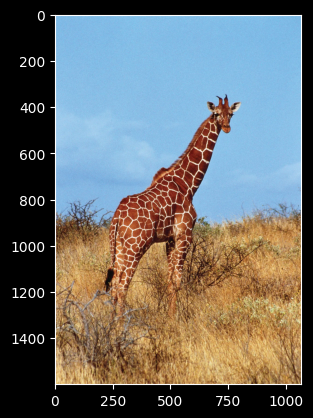

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("img.png")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


In [51]:
image_rgb.shape

(1600, 1067, 3)

In [52]:
rows,cols,_ = image_rgb.shape

[[ 1.02287821e+00  6.29847356e-02 -4.42634568e+01]
 [-5.02940991e-02  1.04090741e+00  5.07662367e+01]
 [ 3.13145264e-05  2.80659423e-05  1.00000000e+00]]


(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

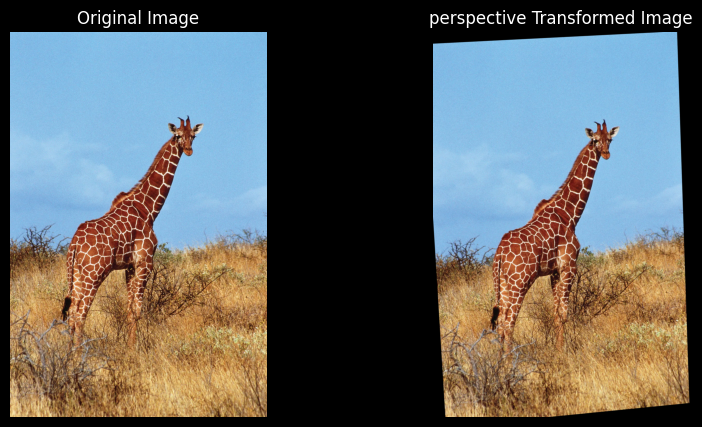

In [53]:
'''
Trasformation matrix for Perspective trasformation

3x3

a, b, c
d, e, f
g, h, 1

a,b,c is responsioble for horizontal scaling, rotation and tranlation
d,e,f is responsioble for vertical scaling, rotation and tranlation
g,h  : Perspective components that account for depth and skew

'''


input_points = np.float32([[50,50],#topleft
                           [cols-50,50],#top right
                           [50,rows-50],# bottom right
                           [cols-50,rows-50],# bottom left
                           ])

output_points = np.float32([[10,100],
                            [cols-100,50],
                            [100,rows-10],
                            [cols-50, rows-100]
                            ])

M=cv2.getPerspectiveTransform(input_points,output_points)
print(M)
perspective_image = cv2.warpPerspective(image_rgb,M ,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("perspective Transformed Image")
plt.axis("off")


In [54]:
input_points = np.float32([[50,50],#topleft
                           [200,50],#top right
                           [50,200]# bottom right
                           ])

output_points = np.float32([[10,100],
                            [200,50],
                            [100,250]
                            ])

M = cv2.getAffineTransform(input_points,output_points)
print(M)


[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

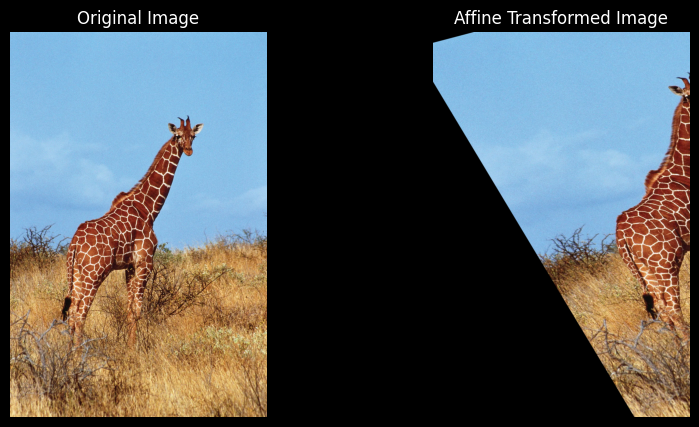

In [55]:
affine_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

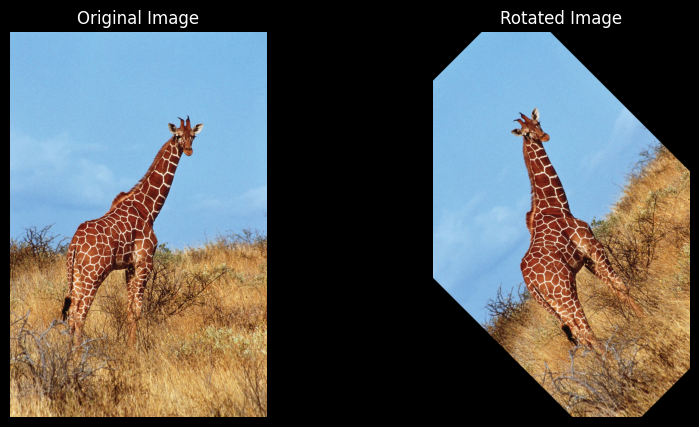

In [56]:
angle = 45
center=(cols//2,rows//2)
scale=1.0
M = cv2.getRotationMatrix2D(center,angle,scale)
rotated_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis("off")

(np.float64(-0.5), np.float64(1866.5), np.float64(1599.5), np.float64(-0.5))

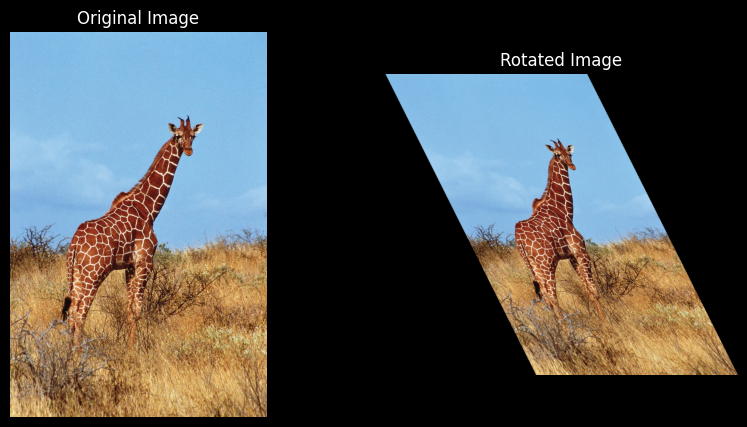

In [58]:
rows,cols,_=image_rgb.shape

sher_x=0.5
sher_y=0.0

M=np.float32([
    [1,sher_x,0],#X
    [sher_y,1,0] #Y
])

new_wid = int(cols + abs(sher_x)*rows)

shered_image = cv2.warpAffine(image_rgb,M,(new_wid,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(shered_image)
plt.title("Rotated Image")
plt.axis("off")



(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

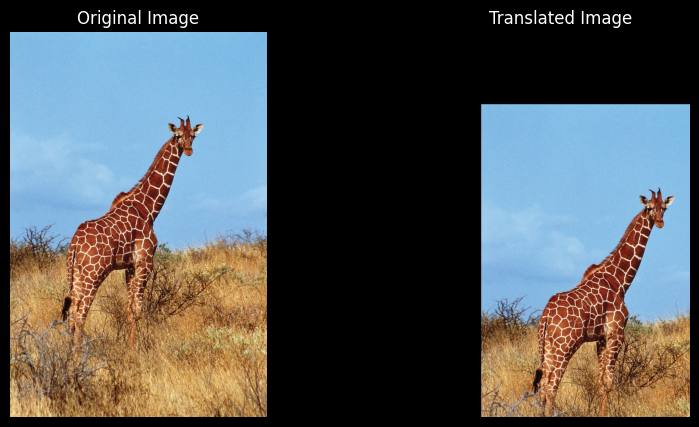

In [59]:
tx,ty = 200,300
M=np.float32([[1,0,tx],
              [0,1,ty]])

translated_image=cv2.warpAffine(image_rgb,M,(cols,rows))


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")


